# Ridge Regression For Human activity recognition using smartphone datasets

In [22]:
from pandas import read_table
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
filename = 'features.txt'
y_label='activity'
dataframe = read_table(filename, delim_whitespace=True,names=['id', 'feature_name'])
activity_map = {str(row.id):row.label_name for i, row in read_table('activity_labels.txt',delim_whitespace=True, names=['id', 'label_name']).iterrows()}
train_data_x = read_table('train/X_train.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
train_data_y = read_table('train/y_train.txt', delim_whitespace=True, names=[y_label])
train_data_y[y_label] = train_data_y[y_label].apply(lambda x: activity_map[str(x)])
train_data = pd.concat([train_data_y, train_data_x], axis=1)
test_data_x = read_table('test/X_test.txt', delim_whitespace=True, names=dataframe.feature_name.tolist())
test_data_y = read_table('test/y_test.txt', delim_whitespace=True, names=[y_label])
test_data_y[y_label] = test_data_y[y_label].apply(lambda x: activity_map[str(x)])
test_data= pd.concat([test_data_y,test_data_x], axis=1)
array = train_data.values #for train datasets 
X = array[:,1:10]
Y = array[:,10]

/home/gautam/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


# For Train datasets 

In [24]:
num_folds=10
kflod = KFold(n_splits=10,random_state=7)
model=Ridge()
scoring='neg_mean_squared_error'
results = cross_val_score(model,X,Y,cv=kflod,scoring=scoring)

In [25]:
print(results) #for train datasets

[-0.00993873 -0.00805062 -0.00640228 -0.00520116 -0.00496109 -0.00975189
 -0.0071666  -0.00619101 -0.00560249 -0.00741048]


In [26]:
print(results.mean()) #for train datasets

-0.0070676355172008005


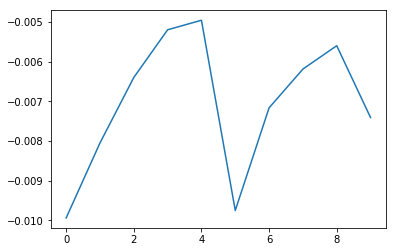

In [27]:
plt.plot(results) # for train datasets

# Now for test datasets

In [28]:
array=test_data.values
X = array[:,1:10]
Y = array[:,10]
num_folds=10
kfold=KFold(n_splits=10,random_state=7)
model=Ridge()
scoring= 'neg_mean_squared_error'
results=cross_val_score(model,X,Y,cv=kflod,scoring=scoring)

In [29]:
print(results)

[-0.01064785 -0.00644286 -0.00951319 -0.00770097 -0.00787728 -0.00512121
 -0.01019814 -0.00717286 -0.0044471  -0.0114268 ]


In [30]:
print(results.mean())

-0.00805482645948506


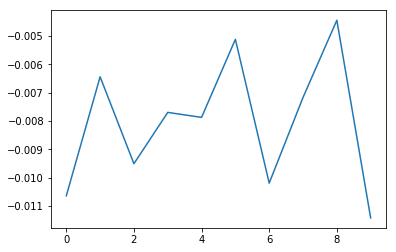

In [31]:
plt.plot(results)